In [ ]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

## 1. Introducción

En este laboratorio se observará el concepto de correlación, la cual es una medida de similitud entre dos series de tiempo en función del retraso de una respecto a la otra. Esta es definida para dos secuencias en tiempo discreto
como:

$ R[k] = \sum_{m=-∞}^{∞}x[m] y[m-k]  $




## 2. Análisis De Pulsos de Radar

In [ ]:
def delay_noise(signal):
    delay=np.random.randint(2*len(signal),4*len(signal),1)
    noise_signal=np.hstack((np.zeros(delay),signal))+np.random.normal(0,0.8,delay+len(signal))
    return noise_signal


'''
La función toma una señal como entrada, le añade un retraso aleatorio y luego agrega ruido gaussiano
también aleatorio a la señal con el retraso.
'''

'\nLa función toma una señal como entrada, le añade un retraso aleatorio y luego agrega ruido gaussiano\ntambién aleatorio a la señal con el retraso.\n'

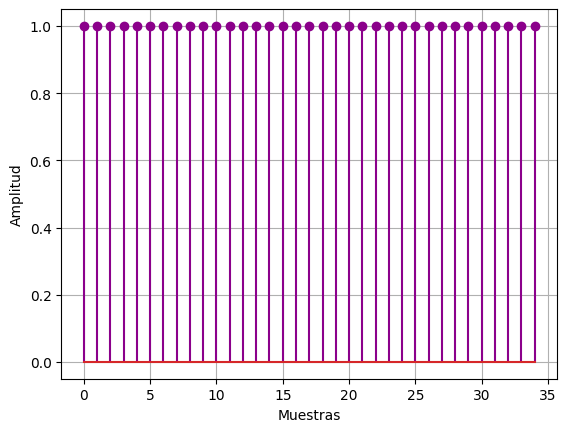

In [ ]:
'''
1. Genere un pulso rectangular de 35 muestras. Tip: Utilice la función de numpy np.ones(35).
'''

pulso = np.ones(35)
plt.stem(pulso, '#8B008B')
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

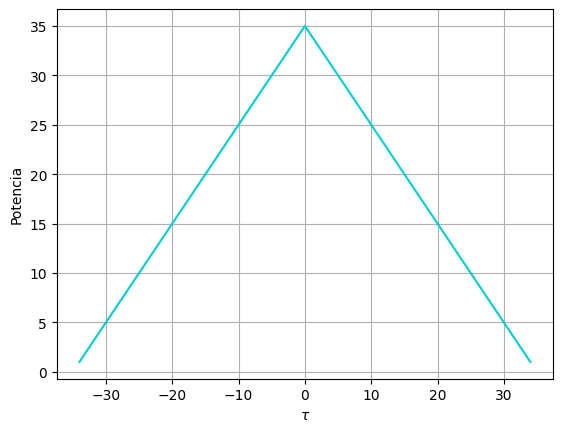

In [ ]:
'''
2. Calcule y grafique la función de autocorrelación del pulso generado.
'''

# Autocorrelación
Rxx = np.correlate(pulso, pulso, mode='full') # Con full, la salida será del mismo tamaño que la suma de las longitudes de los pulsos
tau = np.arange(-len(pulso)+1,len(pulso),1) # Vector de desplazamientos temporales

# Gráfica
plt.plot(tau,Rxx,'#00CED1')
plt.xlabel(r'$\tau$')
plt.ylabel('Potencia')
plt.grid()
plt.show()


¿Qué se puede concluir de la gráfica obtenida?
En tau = 0 se obtiene la potencia máxima (Rxx = 1), esto se debe al solapamiento total entre los pulsos.

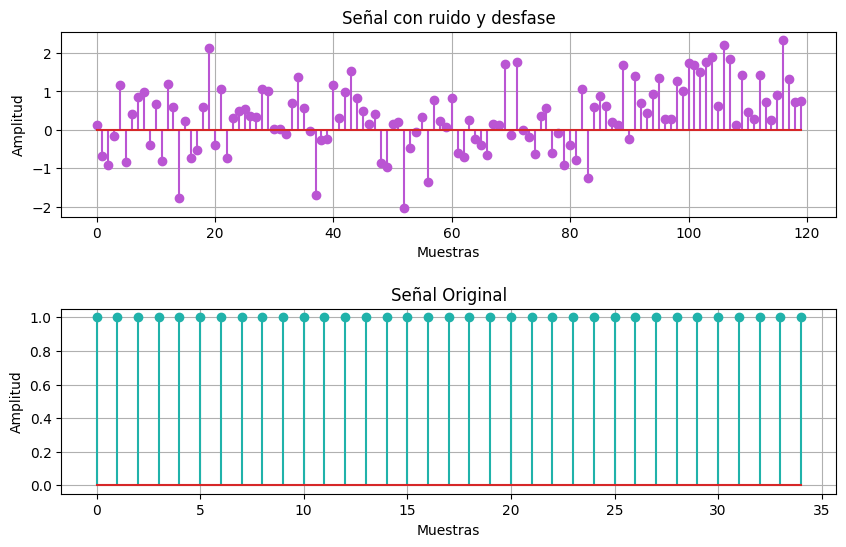

In [ ]:
'''
3. Utilice la función delay noise incluida en la librería adjunta ’utils.py’ para simular el ruido introducido por el
canal, y el desfase de la señal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el
pulso y decir cuanto es su retraso?
'''

dis = delay_noise(pulso)

# Gráficas
# Señal con ruido y desfase
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.stem(dis, '#BA55D3')
plt.title("Señal con ruido y desfase")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.subplots_adjust(hspace=0.5) # Ajustar separación entre subplots
plt.grid()

# Original
plt.subplot(2,1,2)
plt.stem(pulso, '#20B2AA')
plt.title("Señal Original")
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


¿Es capaz de distinguir el pulso y decir cuánto es su retraso?

Al ser sometida a un ruido aleatorio, no tiene un mismo patrón cada que se corre la celda de código y la tarea de distinguirla para poder decir su retraso es imposible.

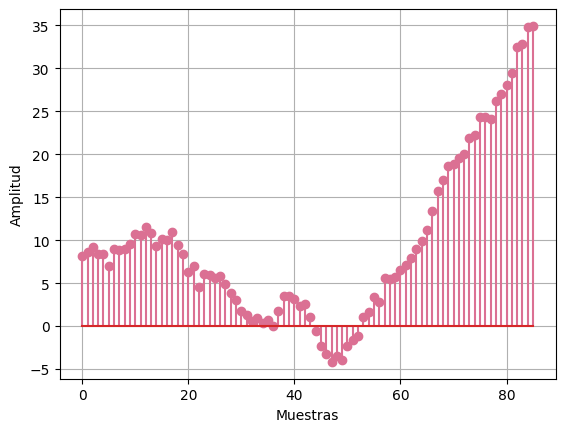

El valor del retraso en muestras es :  85


In [ ]:
'''
4. Utilice la función de numpy np.correlate para hallar la correlacion entre la señal distorsionada y la señal
original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Qué se puede concluir?
Tip 1: Para utilizar la función np.correlate utilice el siguiente comando:
xcorr=np.correlate(delayed pulse,rect pulse)
'''

xcorr = np.correlate(dis,pulso)
plt.stem(xcorr, '#DB7093')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
print('El valor del retraso en muestras es : ' , np.argmax(xcorr)) # Calcula el índice mayor del vector de Rxy, que es el retraso entre las dos señales.

Cerca de las 85 muestras, la correlación presenta su valor máximo, donde también presenta su valor máximo y su retraso.

## 3. Análisis de Encefalograma EEG

En los EEGs se capturan señales por medio de sensores puestos sobre el cuero cabelludo, estos sensores miden los cambios de potencial producidos por la sinapsis de las neuronas. Para la base de datos se utilizaron 22 electrodos para captar señales neuronales, y 3 electrodos oculares para caracterizar los parpadeos, organizados como se muestra en figura 1. Las señales fueron capturadas con una frecuencia
de muestreo de 250Hz y filtradas con un filtro pasa-bandas con frecuencias de corte de 0.5 Hz-100 Hz. El registro
se hizo cuando el participante estaba en estado de reposo y con los ojos abiertos.

NOTA: En esta base de datos los canales se cargan en filas y no por columnas como en muchos casos. Dimensiones del archivo (25, 29683), donde 25 es el numero de canales y 29683 es el numero de muestras.

1. Canal 19
3. Canal 7
5. Canal 11
7. Canal 15
9. Canal 20 «---


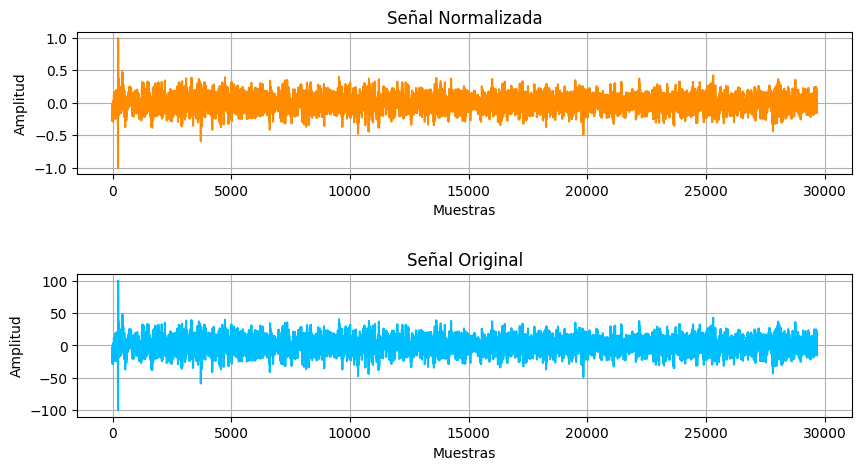

99.61190663374238
99.951171875


In [66]:
'''
Cargue el archivo eeg.npy con numpy.load, para cada canal normalice en amplitud
y elimine el nivel DC. Luego escoja el canal de acuerdo al ultimo numero de su
cédula.
Finalmente grafique el canal elegido (20) con y sin normalización usando subplot
para una fácil comparación.
¿Qué observa? Describa brevemente la diferencia entre las gráficas.
'''

# Canal 20 con fs = 250Hz, filtro pasa-bandas con fc = [0.5 - 100] Hz

# Cargar el archivo
chan20 = np.load('eeg.npy')[20] # Selección de canal
media = np.mean(chan20)
DC = chan20 - media # Al restar la media de la señal original elimino el nivel DC
chan_20 = DC/float(max(abs(DC))) # Normalizo

# Gráficas
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal Normalizada')
plt.grid()
plt.plot(chan_20, '#FF8C00')

plt.subplots_adjust(hspace=0.7) # Ajustar separación entre subplots

plt.subplot(2,1,2)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.plot(chan20, '#00BFFF')
plt.title('Señal Original')
plt.show()


# Valor máximo de las señales
print(DC[np.argmax(chan_20)])
print(chan20[np.argmax(chan20)])

A pesar de no haberle quitado su componente DC, la señal original al igual que la normalizada se encuentra centrada en cero.
Gráficamente son similares pero varía su valor máximo, siendo ligeramente mayor el de la señal original.

### 3.1 Coeficiente de correlación entre canales

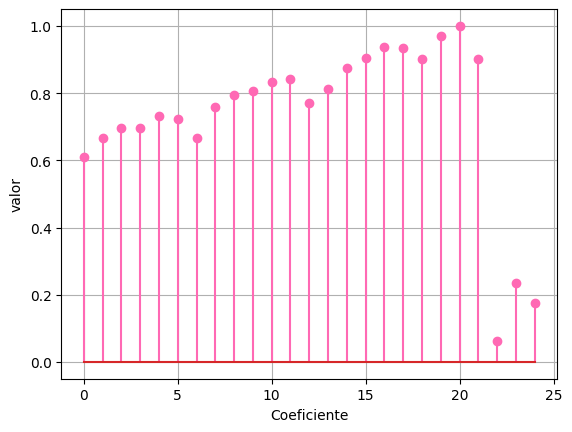

In [ ]:
'''
1. Ahora calcule el coeficiente de correlación entre el canal que le corresponde y los otros canales. Finalmente,
grafique estos coeficientes de correlación (deben ser 25) utilizando la función plt.stem.
Tip: Use la función np.corrcoef para calcular los coeficientes.
'''

# Vuelvo a cargar el archivo y escoger el canal
channels = np.load('eeg.npy')
chan20 = channels[20]
coefs = []

for n in channels: # Itero sobre cada canal
    coef = np.corrcoef(chan20,n) # Coeficiente de correlación entre el canal 20 y cada canal
    coefs.append(coef[0,1])

# Gráfica
plt.stem(coefs, '#FF69B4')
plt.xlabel("Coeficiente")
plt.ylabel("valor")
plt.grid()
plt.show()

2. ¿Cómo varía la correlación entre el canal que le corresponde y los demás canales?. Realice un breve análisis de lo observado.

Los coeficientes de correlación son una relación lineal en este caso entre dos puntos, por lo que entre más cercano a 1 esté, más parecidos son esos puntos. ESto puede verse en el coeficiente 20 que es igual a 1, ya que corresponde a la autocorrelación del canal 20, en cambio con el canal 22 se da la mayor diferencia, pues es el coeficiente más bajo o menos parecido a 1.

### 3.2 Función de autocorrelación de una canal

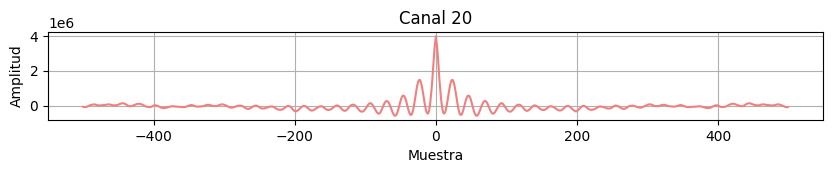

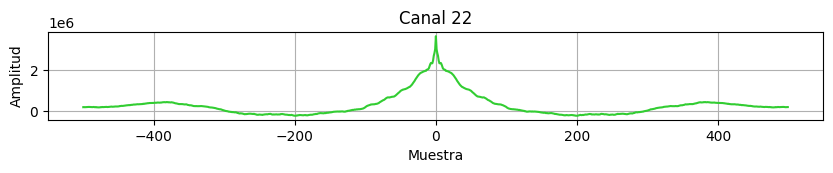

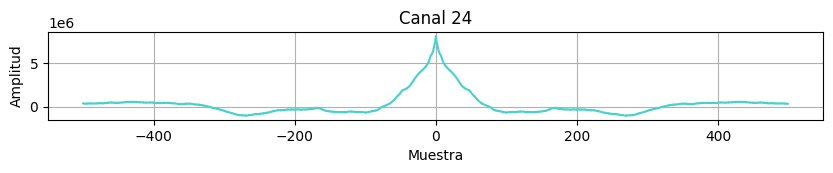

In [ ]:
'''
1. Calcule la función de autocorrelación del canal que le corresponde, luego calcule la función de autocorrelación
para uno de los canales de los ojos (canal 22 o 24), finalmente grafique y compare las dos funciones utilizando
subplots.
'''

# Autocorrelación
auto_corr =  np.correlate(chan20, chan20, mode = 'full')
energy = np.argmax(auto_corr) # Índice con mayor energía
auto_corr =  auto_corr[energy -500 : energy + 500] # Recorto la función al rededor del índice para verla mejor
tau_20 = np.arange(-len(auto_corr)/2 , len(auto_corr)/2 ,1) # Vector de muestras para la visualización


# Autocorrelación del Canal 22
chan22 = np.load('eeg.npy')[22]  # Cargo el canal 22
chan22_corr  = np.correlate(chan22 , chan22, mode = 'full')
chan22_energy =  np.argmax(chan22_corr)
chan22_corr =  chan22_corr[chan22_energy-500: chan22_energy + 500]
tau_22 = np.arange(-len(chan22_corr)/2, len(chan22_corr)/2 ,1)


# Autocorrelación del Canal 24
chan24 = np.load('eeg.npy')[24]  # Cargo el canal 24
chan24_corr  = np.correlate(chan24 , chan24, mode = 'full')
chan24_energy =  np.argmax(chan24_corr)
chan24_corr =  chan24_corr[chan24_energy-500: chan24_energy + 500]
tau_24 = np.arange(-len(chan24_corr)/2, len(chan24_corr)/2 ,1)


# Gráficas
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.7) # Ajustar separación entre subplots
plt.subplot(3,1,1)
plt.plot(tau_20 , auto_corr, '#F08080')
plt.title('Canal 20')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()


plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.7) # Ajustar separación entre subplots
plt.subplot(3,1,2)
plt.plot(tau_22 ,chan22_corr,'#32CD32')
plt.title('Canal 22')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()
plt.show()


plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.7) # Ajustar separación entre subplots
plt.subplot(3,1,3)
plt.plot(tau_24 ,chan24_corr,'#48D1CC')
plt.title('Canal 24')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.grid()
plt.show()

2. ¿Qué observa?. Describa brevemente las gráficas obtenidas.

Grafiqué la autocorrelación de ambos canales para los ojos (22 y 24), en estas se observa un patrón de señal muy diferente al presentado en el canal 20 pero esto se debe al tipo de señal, ya que los canales 22 y 24 tienen la información de la caracterización de los párpados y el canal 20 que representa la información de un electrodo que fue ubicado en la parte trasera de la cabeza representa una señal neuronal.
Así que, la forma de la autocorrelación (semejante a una función sinc(x)) podría indicar periodicidad de la señal neuronal, mientras que los parpadeos no son periódicos.

## 4. Conclusiones


- En aplicaciones de comunicación, evaluar la similitud entre las señales transmitidas y recibidas mediante correlación es fundamental para identificar errores y realizar ajustes para corregir problemas como el retraso y el ruido en las señales.

- En señales del mundo real, identificar el período directamente desde la señal puede ser complicado, pero es posible estimarlo analizando la autocorrelación de la señal y observando las diferencias entre los picos sucesivos en esta función.

- Aunque el coeficiente de correlación de Pearson es comúnmente utilizado, no es la única medida disponible y puede ser limitado para establecer relaciones no lineales entre señales.

- Considerar los coeficientes de correlación al analizar diferentes tipos de señales proporciona información sobre su comportamiento en diversas situaciones, lo que puede ser útil para estudiar posibles déficits neurológicos.

- El análisis de la correlación entre diferentes canales de un EEG puede proporcionar información sobre trastornos, deficiencias o la progresión de un tratamiento basado en las señales captadas por los electrodos.
